In [1]:
import pandas as pd # to import csv and for data manipulation
import matplotlib.pyplot as plt # to plot graph
import seaborn as sns # for intractve graphs
import numpy as np # for linear algebra
import datetime # to dela with date and time
%matplotlib inline

from sklearn.preprocessing import StandardScaler # for preprocessing the data
from sklearn.ensemble import RandomForestClassifier # Random forest classifier
from sklearn.tree import DecisionTreeClassifier # for Decision Tree classifier
from sklearn.svm import SVC # for SVM classification
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split # to split the data
from sklearn.model_selection import KFold # For cross vbalidation
from sklearn.model_selection import GridSearchCV # for tunnig hyper parameter it will use all combination of given parameters
from sklearn.model_selection import RandomizedSearchCV # same for tunning hyper parameter but will use random combinations of parameters

from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
class font:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
print(font.BLUE + "hello world" + font.END)

hello world


In [61]:
data = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [40]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [62]:
obj_col = ['gender', 'Partner', 'Dependents',\
        'PhoneService', 'MultipleLines', 'InternetService',\
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',\
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',\
       'PaperlessBilling', 'PaymentMethod','Churn']

for _ in obj_col:
    print

labels gender: {'Female', 'Male'}
labels Partner: {'No', 'Yes'}
labels Dependents: {'No', 'Yes'}
labels PhoneService: {'No', 'Yes'}
labels MultipleLines: {'No', 'Yes', 'No phone service'}
labels InternetService: {'Fiber optic', 'DSL', 'No'}
labels OnlineSecurity: {'No', 'Yes', 'No internet service'}
labels OnlineBackup: {'No', 'Yes', 'No internet service'}
labels DeviceProtection: {'No', 'Yes', 'No internet service'}
labels TechSupport: {'No', 'Yes', 'No internet service'}
labels StreamingTV: {'No', 'Yes', 'No internet service'}
labels StreamingMovies: {'No', 'Yes', 'No internet service'}
labels Contract: {'One year', 'Two year', 'Month-to-month'}
labels PaperlessBilling: {'No', 'Yes'}
labels PaymentMethod: {'Bank transfer (automatic)', 'Electronic check', 'Credit card (automatic)', 'Mailed check'}
labels Churn: {'No', 'Yes'}


In [63]:
gender_values = {'Female':0, 'Male':1}
yn_values = {'No':0, 'Yes':1}
multiplelines_values = {'No':0, 'Yes':1, 'No phone service':2}
internetservice_values = {'Fiber optic':1, 'DSL':2, 'No':0}
service_values = {'No':0, 'Yes':1, 'No internet service':2}
contract_values = {'One year':0, 'Two year':1, 'Month-to-month':2}
paymnet_values = {'Bank transfer (automatic)':0, \
                  'Electronic check':1,\
                  'Credit card (automatic)':2,\
                  'Mailed check':3}

In [67]:
data.replace({
              'gender':gender_values,'Partner':yn_values,'Dependents':yn_values,\
              'PhoneService':yn_values, 'MultipleLines':multiplelines_values,\
              'InternetService':internetservice_values,'OnlineSecurity':service_values,\
              'OnlineBackup':service_values, 'DeviceProtection':service_values,\
              'TechSupport':service_values, 'StreamingTV':service_values,\
              'StreamingMovies':service_values, 'Contract':contract_values,'PaperlessBilling':contract_values,\
              'PaperlessBilling':yn_values, 'PaymentMethod':paymnet_values,'Churn':yn_values
             },inplace = True)

In [68]:
for _ in obj_col:
    print("labels {}: {}".format(_, set(data[_])))

labels gender: {0, 1}
labels Partner: {0, 1}
labels Dependents: {0, 1}
labels PhoneService: {0, 1}
labels MultipleLines: {0, 1, 2}
labels InternetService: {0, 1, 2}
labels OnlineSecurity: {0, 1, 2}
labels OnlineBackup: {0, 1, 2}
labels DeviceProtection: {0, 1, 2}
labels TechSupport: {0, 1, 2}
labels StreamingTV: {0, 1, 2}
labels StreamingMovies: {0, 1, 2}
labels Contract: {0, 1, 2}
labels PaperlessBilling: {0, 1}
labels PaymentMethod: {0, 1, 2, 3}
labels Churn: {0, 1}


In [69]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table(data)

Your selected dataframe has 21 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


Total Transaction:  7043
No Frauds (Class = 0):  5174 ( 73.46 )%
Frauds (Class = 1):  1869 ( 26.54 )%


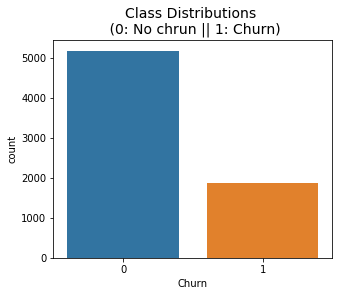

In [72]:
# viz the class distribution
plt.subplots(1, 1, figsize=(5,4))
sns.countplot('Churn', data=data)
plt.title('Class Distributions \n (0: No chrun || 1: Churn)', fontsize=14)

print('Total Transaction: ', len(data))
print('No Frauds (Class = 0): ', data['Churn'].value_counts()[0], '(',round(data['Churn'].value_counts()[0]/len(data) * 100,2), ')%')
print('Frauds (Class = 1): ', data['Churn'].value_counts()[1], '(', round(data['Churn'].value_counts()[1]/len(data)*100,2), ')%')


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null int64
dtypes: float64(1), int64(18), object(2)
memory u

In [94]:
corr = data.corr()

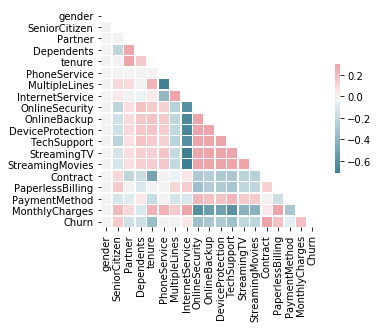

In [96]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})